# MSV / SS 2023 - Übung 5b

In [1]:
import nltk
import pandas as pd
import numpy as np

## Dokumente als Vektoren
### Shakespeare Corpus

In [29]:
nltk.download('shakespeare')
from nltk.corpus import shakespeare
from xml.etree import ElementTree
shakespeare.fileids()

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package shakespeare to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
shakespeare_corpus = {}

for play_title in shakespeare.fileids():
    play = shakespeare.xml(play_title)
    title = play[0].text

    play_text = ""
        
    for line in play.findall('ACT/SCENE/SPEECH/LINE'):
        if line.text is not None:
            #print(line.text)
            play_text += line.text
            play_text += ' '
            
    shakespeare_corpus[title] = play_text 

In [31]:
print(shakespeare_corpus['The Tragedy of Othello, the Moor of Venice'][0:200])

Tush! never tell me; I take it much unkindly That thou, Iago, who hast had my purse As if the strings were thine, shouldst know of this. 'Sblood, but you will not hear me: If ever I did dream of such 


In [32]:
shakespeare_words = ["battle", "good", "fool", "wit"]

#### Term-Document Matrix

In [33]:
shakespeare_docvect = {}

for play in shakespeare_corpus.keys():
    
    play_counts = []
    wordcounts = Counter(word_tokenize(shakespeare_corpus[play]))
    
    for word in shakespeare_words:
        play_counts.append(wordcounts[word])
        
    shakespeare_docvect[play] = play_counts
        

shakespeare_termdoc_df = pd.DataFrame.from_dict(shakespeare_docvect, orient='index',columns=shakespeare_words).T
shakespeare_termdoc_df

,The Tragedy of Antony and Cleopatra,A Midsummer Night's Dream,"The Tragedy of Hamlet, Prince of Denmark",The Tragedy of Julius Caesar,The Tragedy of Macbeth,The Merchant of Venice,"The Tragedy of Othello, the Moor of Venice",The Tragedy of Romeo and Juliet
battle,4,0,0,7,2,0,2,0
good,66,36,82,49,43,55,67,65
fool,7,3,7,2,3,11,12,7
wit,0,4,7,2,2,8,12,12


#### Document-Term Matrix

In [34]:
shakespeare_docterm_df = shakespeare_termdoc_df.T
shakespeare_docterm_df

,battle,good,fool,wit
The Tragedy of Antony and Cleopatra,4,66,7,0
A Midsummer Night's Dream,0,36,3,4
"The Tragedy of Hamlet, Prince of Denmark",0,82,7,7
The Tragedy of Julius Caesar,7,49,2,2
The Tragedy of Macbeth,2,43,3,2
The Merchant of Venice,0,55,11,8
"The Tragedy of Othello, the Moor of Venice",2,67,12,12
The Tragedy of Romeo and Juliet,0,65,7,12


#### Query

In [35]:
shakespeare_query = [(1, 40, 14, 11)]  
shakespeare_query_df = pd.DataFrame(shakespeare_query, columns = ['battle' , 'good', 'fool', 'wit'], index=['query'])
shakespeare_query_df

,battle,good,fool,wit
query,1,40,14,11


#### Kookkurrenz-Matrix

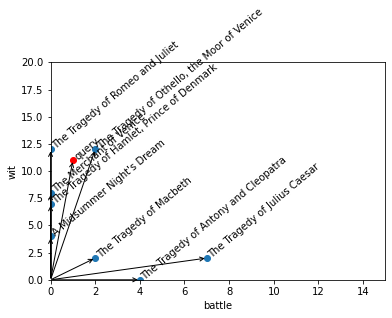

In [36]:
to_plot = shakespeare_docterm_df

fig, ax = plt.subplots()

ax.scatter(to_plot['battle'], to_plot['wit'])
ax.set_xlabel('battle')
ax.set_ylabel('wit')
ax.set_xlim([0, 15])
ax.set_ylim([0, 20])

for play in shakespeare_corpus.keys():
    ax.annotate(play, (to_plot['battle'][play], to_plot['wit'][play]), rotation=40)
    ax.annotate("", xy=(to_plot['battle'][play], to_plot['wit'][play]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

ax.scatter(1, 11, color = 'red')
ax.annotate('query', (1, 11), rotation=40)
ax.annotate("", xy=(1, 11), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))    
    
plt.show()

#### Nearest Neighbor to Query

In [37]:
shakespeare_simtable = shakespeare_docterm_df

shakespeare_similarities = {}

for play in shakespeare_corpus.keys():
    
    shakespeare_similarities[play] = cosine_similarity(shakespeare_query_df.loc[['query']], shakespeare_docterm_df.loc[[play]])[0][0]

print(max(shakespeare_similarities))

The Tragedy of Romeo and Juliet


## Gewichtungsfunktionen
### Uninformative Wörter (Brown Corpus)

In [38]:
cleaned_brown = [token for token in brown.words() if token not in punctuation]
sixgrams = Counter(list(ngrams(cleaned_brown,6)))

In [39]:
cooccurrence = {}

for k in sixgrams.keys():
    
    if k[0] == "car": 
        
        for c_word in k[1:4]: 
                       
            if c_word in cooccurrence.keys(): cooccurrence[c_word] += 1
            else: cooccurrence[c_word] = 1
                
    if k[4] == "car":
        
        for c_word in k[0:3]:

            if c_word in cooccurrence.keys():  cooccurrence[c_word] += 1
            else: cooccurrence[c_word] = 1
                
cooccurrence = {key:val for key, val in cooccurrence.items() if val > 5}               
print(dict(sorted(cooccurrence.items(), key = lambda x: x[1], reverse = True)))

{'the': 106, 'in': 48, 'and': 47, 'of': 44, 'to': 44, 'a': 43, 'was': 31, 'with': 23, 'The': 19, 'I': 19, 'is': 16, 'you': 16, 'on': 15, 'had': 15, 'by': 13, 'he': 13, 'at': 13, 'He': 12, 'into': 12, 'it': 11, 'that': 11, 'for': 11, 'out': 10, 'as': 9, 'his': 9, 'up': 9, 'when': 9, 'which': 9, 'got': 9, 'will': 8, 'said': 8, 'be': 8, 'one': 8, 'take': 7, 'driving': 7, 'have': 7, 'back': 7, 'coming': 7, 'around': 6, 'get': 6, 'but': 6, 'before': 6, 'drive': 6, 'she': 6, 'parked': 6, 'see': 6}


### tf-idf (Shakespeare Corpus)

In [40]:
shakespeare_docterm_df

,battle,good,fool,wit
The Tragedy of Antony and Cleopatra,4,66,7,0
A Midsummer Night's Dream,0,36,3,4
"The Tragedy of Hamlet, Prince of Denmark",0,82,7,7
The Tragedy of Julius Caesar,7,49,2,2
The Tragedy of Macbeth,2,43,3,2
The Merchant of Venice,0,55,11,8
"The Tragedy of Othello, the Moor of Venice",2,67,12,12
The Tragedy of Romeo and Juliet,0,65,7,12


In [41]:
shakespeare_tf = {}
shakespeare_idf = {}
shakespeare_tfidf = {}

for w in shakespeare_words:
    shakespeare_tf[w] = {}
    shakespeare_idf[w] = 0
    
    for play in shakespeare_corpus.keys():
        
        shakespeare_tf[w][play] = np.log10(shakespeare_docterm_df[w][play]+1)
        
        if shakespeare_docterm_df[w][play] > 1: 
            shakespeare_idf[w] += 1
            
    shakespeare_idf[w] = np.log10(len(shakespeare_corpus.keys())/shakespeare_idf[w])
    
for w in shakespeare_words:
    shakespeare_tfidf[w] = {}
    for play in shakespeare_corpus.keys():
        shakespeare_tfidf[w][play] = shakespeare_tf[w][play]*shakespeare_idf[w]
        
shakespeare_tfidf_df = pd.DataFrame.from_dict(shakespeare_tfidf)
shakespeare_tfidf_df

,battle,good,fool,wit
The Tragedy of Antony and Cleopatra,0.210411,0.0,0.0,0.000000
A Midsummer Night's Dream,0.000000,0.0,0.0,0.040535
"The Tragedy of Hamlet, Prince of Denmark",0.000000,0.0,0.0,0.052372
The Tragedy of Julius Caesar,0.271857,0.0,0.0,0.027669
The Tragedy of Macbeth,0.143628,0.0,0.0,0.027669
The Merchant of Venice,0.000000,0.0,0.0,0.055338
"The Tragedy of Othello, the Moor of Venice",0.143628,0.0,0.0,0.064600
The Tragedy of Romeo and Juliet,0.000000,0.0,0.0,0.064600
